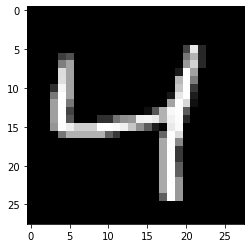

In [6]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# mnist data download
(x_train, t_train), (x_test, t_test) = mnist.load_data()
plt.imshow(x_train[2], cmap='gray') 
import numpy as np


In [7]:
horizontal_filter = np.array([[1., 1., 1.],
                              [0., 0., 0.],
                              [-1., -1., -1.]])
vertical_filter = np.array([[1., 0., -1.],
                            [1., 0., -1.],
                            [1., 0., -1.]])
test_image = x_train[2]
original_image_size = test_image.shape[0]
print(f'original_image_size = {original_image_size}')
conv_output_size = int((original_image_size - 3)/1 + 1)
print(f'output size = {conv_output_size}')


original_image_size = 28
output size = 26


In [2]:
filter_size = 3

def get_conv_image(filter):
    filtered_image = np.zeros((conv_output_size, conv_output_size))
    for i in range(conv_output_size):
        for j in range(conv_output_size):
            # 합성곱 연산
            indice_image = test_image[i:(i + filter_size), j:(j + filter_size)] * filter
            indice_sum = np.sum(indice_image)
            if(indice_sum > 255):
                indice_sum = 255
            filtered_image[i, j] = indice_sum
    return filtered_image

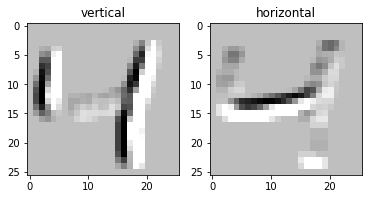

In [3]:
vertical_filtered_image = get_conv_image(vertical_filter)
horizontal_filtered_image = get_conv_image(horizontal_filter)
plt.subplot(1, 2, 1)
plt.title('vertical')
plt.imshow(vertical_filtered_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('horizontal')
plt.imshow(horizontal_filtered_image, cmap='gray')
plt.show()

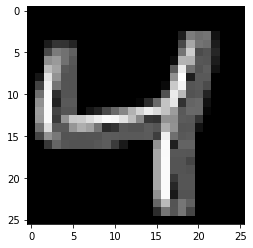

In [4]:
sobel_image = np.sqrt(np.square(horizontal_filtered_image) + np.square(vertical_filtered_image)) 
plt.imshow(sobel_image, cmap='gray')


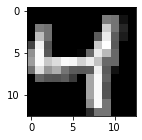

In [12]:
import numpy as np

image = sobel_image #x_train[2]
image_x = image.shape[0]
image_y = image.shape[1]

new_image_x = int(image_x / 2)
new_image_y = int(image_y / 2)

pooled_image = np.zeros((new_image_x, new_image_y))

for x in range(0, image_x, 2):
    for y in range(0, image_y, 2):
        pooled_image[int(x/2), int(y/2)] = np.max(image[x:x + 2, y:y + 2]) # pool_size(2,2)

plt.figure(figsize=(2, 2)) 
plt.imshow(pooled_image, cmap='gray')


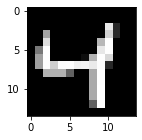

In [11]:
import numpy as np

image = x_train[2]
image_x = image.shape[0]
image_y = image.shape[1]

new_image_x = int(image_x / 2)
new_image_y = int(image_y / 2)

pooled_image = np.zeros((new_image_x, new_image_y))

for x in range(0, image_x, 2):
    for y in range(0, image_y, 2):
        pooled_image[int(x/2), int(y/2)] = np.max(image[x:x + 2, y:y + 2]) # pool_size(2,2)

plt.figure(figsize=(2, 2))
plt.imshow(pooled_image, cmap='gray')


# Keras API (Sequential vs Functional)

train: (60000, 28, 28), test: (10000, 28, 28)


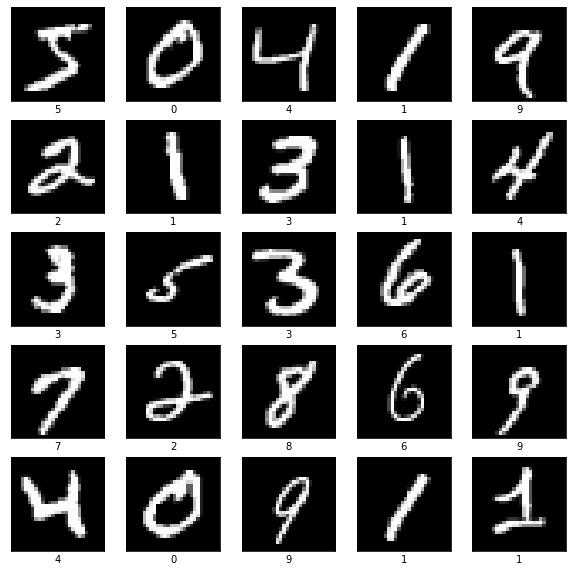

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

mnist = tf.keras.datasets.mnist # Mnist 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 전처리

print(f'train: {x_train.shape}, test: {x_test.shape}')

plt.figure(figsize=(10, 10))
for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(y_train[index]))
plt.show()


# Sequential 사용

### Conv2D(16, 3 or (3, 3), padding='valid', input_shape=(28, 28, 1), activation='relu
 - 첫번째 인자: 컨볼루션필터의 수
 - 두번째 인자: 컨볼루션 커널의 형 (행,열) 크기
 - padding: 경계 처리 방법 정의
  - valid: 유효한 영역만 출력, 출력 이미지 사이즈는 입력 사이즈보다 작아진다.
  - same: 출력 이미지 사이즈가 입력 입미지 사이즈와 동일
 - input_shape: 샘플 수를 제외한 입력 형태 정의. 모델에서 첫 레이어일 때만 정의한다.
  - (행, 열, 채널 수)로 정의한다. 흑백영상인 경우에는 채널이 1이고, 컬러(rgb)영상인 경우에는 채널을 3으로 설정한다.
 - activation: 활성화 함수를 설정.
  - linear: 입력 뉴런과 가중치로 계산된 결과값이 그대로 출력으로나오다. default=None
  - relu: rectifier 함수, 은닉층에 주로 쓰인다.
  - sigmoid: 시그모이드 함수.이진분류 문제에서 출력츠에 주로쓰인다.
  - softmax: 다중클래스 분류분제에서 출력층에 쓰인다.

In [26]:
model = tf.keras.models.Sequential([tf.keras.layers.Reshape((28, 28, 1)),
                                    tf.keras.layers.Conv2D(16, 3, activation='relu'),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=256)
model.evaluate(x_test, y_test, verbose=2)


Epoch 1/5
235/235 [==============================] - 3s 14ms/step - loss: 0.2518 - accuracy: 0.9276
Epoch 2/5
235/235 [==============================] - 3s 14ms/step - loss: 0.0756 - accuracy: 0.9785
Epoch 3/5
235/235 [==============================] - 3s 14ms/step - loss: 0.0486 - accuracy: 0.9860
Epoch 4/5
235/235 [==============================] - 3s 14ms/step - loss: 0.0336 - accuracy: 0.9901
Epoch 5/5
235/235 [==============================] - 3s 14ms/step - loss: 0.0234 - accuracy: 0.9932
313/313 - 0s - loss: 0.0493 - accuracy: 0.9846


[0.04931959882378578, 0.9846000075340271]

# Functional API 사용

In [27]:
inputs = keras.Input(shape=(28, 28))
x = layers.Reshape((28, 28, 1))(inputs)
x = layers.Conv2D(16, 3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)
outputs = x

model = keras.Model(inputs, outputs)
model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
flatten_4 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 1,386,026
Trainable params: 1,386,026
Non-trainable params: 0
_________________________________________________

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=256)

model.evaluate(x_test, y_test, verbose=2) # verbose 0, 1, 2 로그 출력 값 parameter


Epoch 1/5
235/235 [==============================] - 3s 14ms/step - loss: 0.2548 - accuracy: 0.9260
Epoch 2/5
235/235 [==============================] - 3s 14ms/step - loss: 0.0832 - accuracy: 0.9759
Epoch 3/5
235/235 [==============================] - 3s 14ms/step - loss: 0.0514 - accuracy: 0.9846
Epoch 4/5
235/235 [==============================] - 3s 14ms/step - loss: 0.0353 - accuracy: 0.9893
Epoch 5/5
235/235 [==============================] - 3s 14ms/step - loss: 0.0257 - accuracy: 0.9926
313/313 - 0s - loss: 0.0530 - accuracy: 0.9828


[0.05297539755702019, 0.9828000068664551]

# Pooling 사용

In [25]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

x_train = np.reshape(x_train, (60000,28,28,1))
x_test = np.reshape(x_test, (10000,28,28,1))

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2))) # param 은 커널...
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               346240    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=512)
model.evaluate(x_test, y_test, verbose=2)


Epoch 1/5
118/118 [==============================] - 3s 22ms/step - loss: 9.4163e-05 - accuracy: 1.0000
Epoch 2/5
118/118 [==============================] - 3s 23ms/step - loss: 2.4242e-04 - accuracy: 0.9999
Epoch 3/5
118/118 [==============================] - 3s 23ms/step - loss: 1.0402e-04 - accuracy: 1.0000
Epoch 4/5
118/118 [==============================] - 3s 23ms/step - loss: 1.0490e-04 - accuracy: 1.0000
Epoch 5/5
118/118 [==============================] - 3s 23ms/step - loss: 7.2949e-05 - accuracy: 1.0000
313/313 - 0s - loss: 0.0845 - accuracy: 0.9871


[0.08447130769491196, 0.9871000051498413]

# 조금더 깊은 layer

In [33]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)

model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
118/118 [==============================] - 14s 32ms/step - loss: 1.1985 - accuracy: 0.6790
Epoch 2/5
118/118 [==============================] - ETA: 0s - loss: 0.1864 - accuracy: 0.94 - 4s 33ms/step - loss: 0.1858 - accuracy: 0.9442
Epoch 3/5
118/118 [==============================] - 4s 33ms/step - loss: 0.1179 - accuracy: 0.9669
Epoch 4/5
118/118 [==============================] - 4s 32ms/step - loss: 0.0917 - accuracy: 0.9716
Epoch 5/5
118/118 [==============================] - 4s 33ms/step - loss: 0.0742 - accuracy: 0.9772
313/313 - 1s - loss: 0.0708 - accuracy: 0.9787


[0.07077878713607788, 0.9786999821662903]

# Padding의 유무

In [35]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)
model.evaluate(x_test, y_test, verbose=2)


Epoch 1/5
118/118 [==============================] - 6s 42ms/step - loss: 1.1567 - accuracy: 0.6838
Epoch 2/5
118/118 [==============================] - 5s 43ms/step - loss: 0.1867 - accuracy: 0.9439
Epoch 3/5
118/118 [==============================] - 5s 43ms/step - loss: 0.1132 - accuracy: 0.9662
Epoch 4/5
118/118 [==============================] - 5s 42ms/step - loss: 0.0844 - accuracy: 0.9739
Epoch 5/5
118/118 [==============================] - 5s 42ms/step - loss: 0.0661 - accuracy: 0.9797
313/313 - 1s - loss: 0.0529 - accuracy: 0.9821


[0.05291695520281792, 0.9821000099182129]

# 이미지 분류 - cifar10

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [51]:
# 데이터 로드
cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(f"Train: {train_images.shape}:{train_labels.shape}, Test: {test_images.shape}:{test_labels.shape}")

train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))
print(f"Train samples(reshape): {train_images.shape}, {train_labels.shape}")
print(f"Test samples(reshape): {test_images.shape}, {test_labels.shape}")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Train: (50000, 32, 32, 3):(50000, 1), Test: (10000, 32, 32, 3):(10000, 1)
Train samples(reshape): (50000, 32, 32, 3), (50000, 1)
Test samples(reshape): (10000, 32, 32, 3), (10000, 1)


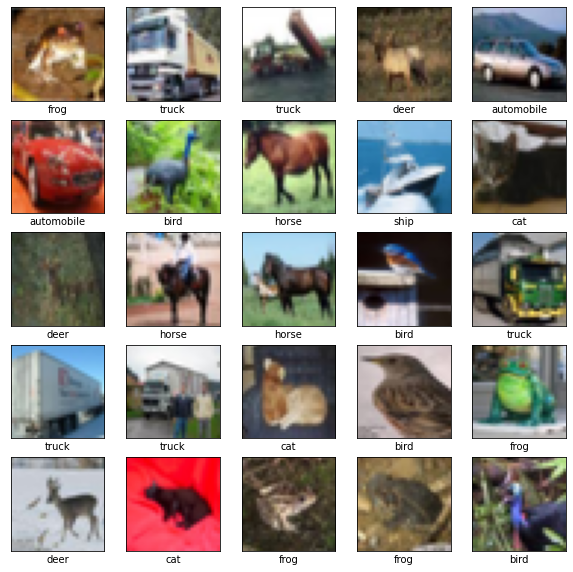

In [53]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [40]:
# 전처리 작업
train_images = train_images/255.0
test_images = test_images/255.0


In [41]:
# 모델 정의
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [54]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=1024)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')


Epoch 1/10
98/98 [==============================] - 10s 101ms/step - loss: 39.9274 - accuracy: 0.8142
Epoch 2/10
98/98 [==============================] - 10s 101ms/step - loss: 19.5911 - accuracy: 0.8460
Epoch 3/10
98/98 [==============================] - 10s 102ms/step - loss: 14.2125 - accuracy: 0.8531
Epoch 4/10
98/98 [==============================] - 10s 102ms/step - loss: 10.7784 - accuracy: 0.8607
Epoch 5/10
98/98 [==============================] - 10s 103ms/step - loss: 8.4012 - accuracy: 0.8692
Epoch 6/10
98/98 [==============================] - 10s 103ms/step - loss: 6.8655 - accuracy: 0.8730
Epoch 7/10
98/98 [==============================] - 10s 102ms/step - loss: 5.3309 - accuracy: 0.8828
Epoch 8/10
98/98 [==============================] - 10s 102ms/step - loss: 4.2296 - accuracy: 0.8939
Epoch 9/10
98/98 [==============================] - 10s 103ms/step - loss: 3.7298 - accuracy: 0.8953
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 42.7698 - ac

In [55]:
predictions = model.predict(test_images)

In [47]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'        
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label[0]]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')


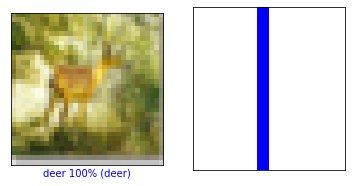

In [63]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()


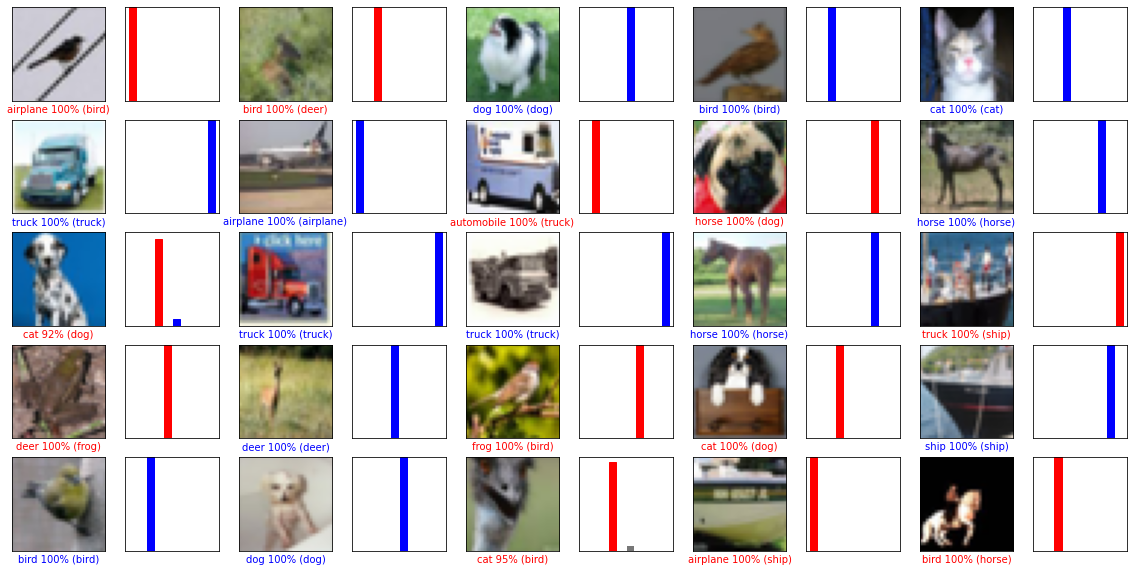

In [76]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols

idx=0
plt.figure(figsize=(20, 10))
for i in np.random.randint(0, 10000, size=25):
    plt.subplot(5, 10, 2*idx+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(5, 10, 2*idx+2)
    plot_value_array(i, predictions, test_labels)
    idx += 1
plt.show()